Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [21]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2023.09.1
2.3.0


In [22]:
import qiskit.tools.jupyter
%qiskit_version_table

#### Question 1 

Sa formule moléculaire est :  $ C_{56}H_{32}N_{6} $ 

Son poids moléculaire esst : 788.9 g/mol

#### Question 2

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolFromSmiles

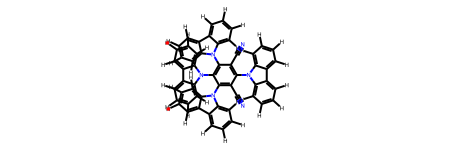

In [2]:
smi = 'C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N'
m = Chem.MolFromSmiles(smi)
mol = AllChem.AddHs(m)
mol

#### Question 3

In [3]:
from rdkit.Chem import Descriptors

In [4]:
molwt = Descriptors.ExactMolWt(mol) 
molwt1 = Descriptors.ExactMolWt(m)
logP = Descriptors.MolLogP(mol) 
tpsa = Descriptors.TPSA(mol) 
hbd = Descriptors.NumHDonors(mol)
hba = Descriptors.NumHAcceptors(mol)

print(f'Our molecular properties are:\n Molecular weight:{molwt},\n Molecular weight1:{molwt1}, \n polarity:{tpsa}, \n solubility:{logP}, \n Hbd:{hbd}, \n Hba:{hba}')

Our molecular properties are:
 Molecular weight:788.2688450240009,
 Molecular weight1:788.268845024, 
 polarity:67.3, 
 solubility:13.818359999999974, 
 Hbd:0, 
 Hba:6


In [5]:
Descripteurs = [molwt,molwt1,logP,tpsa,hbd,hba]

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(Descripteurs,['molwt','molwt1','logP','tpsa','hbd','hba'])
df

,0
molwt,788.268845
molwt1,788.268845
logP,13.818360
tpsa,67.300000
hbd,0.000000
hba,6.000000


#### Question 4 

In [9]:
import rdkit

In [10]:
rdkit.Chem.AllChem.EmbedMolecule(mol)
rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
rdkit.Chem.MolToXYZFile(mol, 'Tcheuffa_4CzIPN.xyz')

#### Question 5 

Le nombre d'atomes qui constituent notre molécule est : 94 

In [22]:
with open('Tcheuffa_4CzIPN.xyz', 'r') as file:
    lines = file.readlines()

# Supprimer le chiffre au début du fichier
lines[1] = lines[1].split(' ', 2)[2]

# Enregistrer le fichier modifié
new_filename = 'Tcheuffa_4CzIPN_modifie.xyz'
with open(new_filename, 'w') as file:
    file.writelines(lines)

IndexError: list index out of range

In [23]:
import os

In [24]:
chemin_fichier = os.path.join(os.getcwd(), 'Tcheuffa_4CzIPN.xyz')
print("Chemin du fichier :", chemin_fichier)

Chemin du fichier : /home/elvira/Downloads/UY1_NE_Qiskitv230418/UY1_NE_Qiskit/Tcheuffa_4CzIPN.xyz


In [25]:
chemin_fichier = 'Tcheuffa_4CzIPN.xyz'

# Lecture du contenu du fichier avant la suppression
with open(chemin_fichier, 'r') as fichier:
    contenu_avant = fichier.read()

# Suppression du premier élément
with open(chemin_fichier, 'r+') as fichier:
    lignes = fichier.readlines()
    lignes = lignes[1:]
    fichier.seek(0)
    fichier.writelines(lignes)
    fichier.truncate()

# Lecture du contenu du fichier après la suppression
with open(chemin_fichier, 'r') as fichier:
    contenu_apres = fichier.read()

# Vérification du résultat
if contenu_avant != contenu_apres:
    print("Le premier élément a été effacé avec succès.")
else:
     print("Le premier élément n'a pas été effacé.")

Le premier élément a été effacé avec succès.


#### Question 6 

In [28]:
import pyscf

In [29]:
from pyscf import gto

In [30]:
CzIPN_mol = pyscf.gto.M(atom=open('Tcheuffa_4CzIPN.xyz').read(),
 charge=0,
 spin=0,
 basis='631g*',
 unit='Angstrom')
enuc = CzIPN_mol.build().get_enuc()
print(f"L'énergie nucléaire de la molécule est : {enuc} ")

L'énergie nucléaire de la molécule est : 8751.620127456048 


#### Question 7

In [31]:
from qiskit.opflow.operator_globals import I, X, Y, Z
from qiskit.algorithms import NumPyMinimumEigensolver

/tmp/ipykernel_7869/3256284907.py:1: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow.operator_globals import I, X, Y, Z
/tmp/ipykernel_7869/3256284907.py:2: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import NumPyMinimumEigensolver


In [32]:
K = I.tensor(I)
A = Z.tensor(I) - I.tensor(Z)
M = Z.tensor(Z)
E = X.tensor(X)
N = X.tensor(I) + I.tensor(X)
I = X.tensor(Z) - Z.tensor(X)

In [33]:
H = (-0.46959492273396025*K) + (-0.12480163590374627*A) + (-0.026903253444563915*M) + (0.00492457593505212*E) + (-4.6840929608197336e-06*N) + (- 4.683976972721447e-06*I) 
print(H)

-0.46959492273396025 * II
- 0.12480163590374627 * ZI
+ 0.12480163590374627 * IZ
- 0.026903253444563915 * ZZ
+ 0.00492457593505212 * XX
- 4.6840929608197336e-06 * XI
- 4.6840929608197336e-06 * IX
- 4.683976972721447e-06 * XZ
+ 4.683976972721447e-06 * ZX


In [34]:
exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'The exact ground state energy is: {exact_result.eigenvalue}')

/tmp/ipykernel_7869/1463833043.py:1: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)


The exact ground state energy is: -0.6923435163588453
